<a href="https://colab.research.google.com/github/Lucs1590/PID/blob/master/homework_5/face.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Import Libraries

In [ ]:
!pip install mtcnn
import os
import cv2
import random
import glob
import gdown
import tarfile
import zipfile

import numpy as np 

from os import path
from matplotlib import pyplot as plt
from google.colab.patches import cv2_imshow
from mtcnn import MTCNN

# Get Faces Dataset (ARFACE)
First, we will check if the data set is here, if not, we will download it.


In [ ]:
def unzip_file(_file, destination):
    with zipfile.ZipFile(_file, 'r') as zip_ref:
      zip_ref.extractall(destination)
    os.remove(_file)

In [ ]:
def get_dataset(output, destination):
  url = 'https://drive.google.com/u/2/uc?export=download&confirm=HiLF&id=1BQuEQfmMiA_cEYmvkQDCnYAJd_TT3rCk'
  try:
    gdown.download(url, output, quiet=False)
    unzip_file(output, destination)

  except Exception:
    raise ConnectionError(
        'you need to be connected to some internet network to download the database.')

In [ ]:
def load_dataset():
  _path = path.abspath(os.getcwd())
  destination = _path + '/arface'
  dataset_file = destination + '/arface.zip'

  if not path.isdir(destination):
    os.mkdir(_path+'/arface')

  if not path.isdir(destination + '/face'):
    get_dataset(dataset_file, destination)
  elif path.isfile(dataset_file):
    unzip_file(dataset_file, destination)
  else:
    if not path.isdir(destination + '/face'):
      print('Dataset is set!')
    raise OSError(
            'the default directory of Python is not found.')

In [ ]:
load_dataset()
''' import shutil
_path = path.abspath(os.getcwd())
destination = _path + '/arface'
shutil.rmtree(destination) '''

Downloading...
From: https://drive.google.com/u/2/uc?export=download&confirm=HiLF&id=1BQuEQfmMiA_cEYmvkQDCnYAJd_TT3rCk
To: /content/arface/arface.zip
760MB [00:09, 82.1MB/s]


" import shutil\n_path = path.abspath(os.getcwd())\ndestination = _path + '/arface'\nshutil.rmtree(destination) "

# MTCNN Face Detection

In [ ]:
def plot_poits(_image, detected_face):
  if len(detected_face):
    x1,y1,x2,y2 = detected_face[0]['box']
    _image = cv2.rectangle(_image, (x1, y1), (x2, y2), (255,0,0), 2)
    for point in detected_face[0]['keypoints'].values():
      x,y = point
      _image = cv2.circle(_image, (x,y), radius=1, color=(0, 0, 255), thickness=3)
  return _image

In [ ]:
def get_random_image(_path):
  return random.choice(glob.glob(path.join(_path, "*.bmp")))

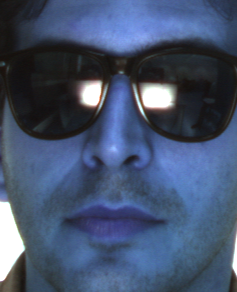

[{'box': [2, 7, 234, 290], 'confidence': 0.9999234676361084, 'keypoints': {'left_eye': (66, 102), 'right_eye': (174, 110), 'nose': (115, 156), 'mouth_left': (66, 213), 'mouth_right': (161, 218)}}]
/content/arface/face/Cm-044-8_face.bmp


In [ ]:
_path = path.abspath(os.getcwd()) + '/arface/face'
img_path = get_random_image(_path)

img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2RGB)
detected_face = MTCNN().detect_faces(img)
img = plot_poits(img,detected_face)
img = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_RGB2BGR)
cv2_imshow(img)

print(detected_face)
print(img_path)

# Local Binary Pattern (LBP)

In [ ]:
def get_pixel(img, center, x, y): 
  new_value = 0
  try:
    if img[x][y] >= center:
      new_value = 1            
  except:
    pass
  
  return new_value 

In [ ]:
def lbp_calculated_pixel(img, x, y):
  center = img[x][y] 
  val_ar = [] 
  
  val_ar.append(get_pixel(img, center, x-1, y-1)) 
  val_ar.append(get_pixel(img, center, x-1, y)) 
  val_ar.append(get_pixel(img, center, x-1, y + 1)) 
  val_ar.append(get_pixel(img, center, x, y + 1)) 
  val_ar.append(get_pixel(img, center, x + 1, y + 1)) 
  val_ar.append(get_pixel(img, center, x + 1, y)) 
  val_ar.append(get_pixel(img, center, x + 1, y-1)) 
  val_ar.append(get_pixel(img, center, x, y-1)) 
       
  power_val = [1, 2, 4, 8, 16, 32, 64, 128] 
  val = 0
    
  for i in range(len(val_ar)): 
    val += val_ar[i] * power_val[i]
    
  return val 

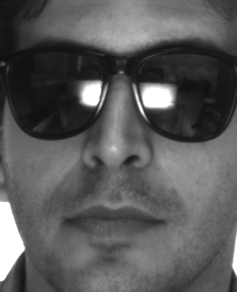

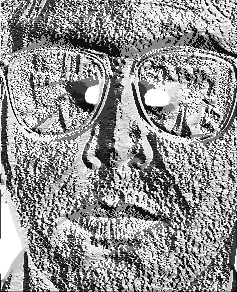

In [ ]:
img_gray = cv2.cvtColor(cv2.imread(img_path), cv2.COLOR_BGR2GRAY)
height, width = img_gray.shape
img_lbp = np.zeros((height, width), np.uint8) 

for i in range(0, height):
  for j in range(0, width):
    img_lbp[i, j] = lbp_calculated_pixel(img_gray, i, j)

cv2_imshow(img_gray)
cv2_imshow(img_lbp)

# Comparison Metrics
Here we use metrics like ROC, CMC, Rank-1, Precision-Recall, EER, F-Measure, AUC (Area Under Curve).

# Apply Filters
In this step, filters are placed randomly in the image, so that it is possible to visualize the influence of factors such as lighting, for example.

# Comparison Between Genuine and Imposter

# Siamese Network
